In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils.multiclass import unique_labels
import xgboost as xgb
from sklearn.metrics import accuracy_score
from mlxtend.evaluate import confusion_matrix
import itertools


    
    
def plot_roc_chart(ax: plt.Axes, models: dict, tstX, tstY, target: str='class'):
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('FP rate')
    ax.set_ylabel('TP rate')
    ax.set_title('ROC chart for %s'%target)
    ax.plot([0, 1], [0, 1], color='navy', label='random', linestyle='--')
    
    for clf in models:
        scores = models[clf].predict_proba(tstX)[:,1]
        fpr, tpr, _ = metrics.roc_curve(tstY, scores,  pos_label=1)
        roc_auc = metrics.roc_auc_score(tstY, scores)
        ax.plot(fpr, tpr, label='%s (auc=%0.2f)' %(clf, roc_auc))
    ax.legend(loc="lower center")



In [14]:


#convETC.csv
#convAfterUndersampling
#convKBest.csv

from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split

PDdata = pd.read_csv('convAfterUndersampling.csv', sep=',')
#print(PDdata)

<Figure size 432x288 with 0 Axes>

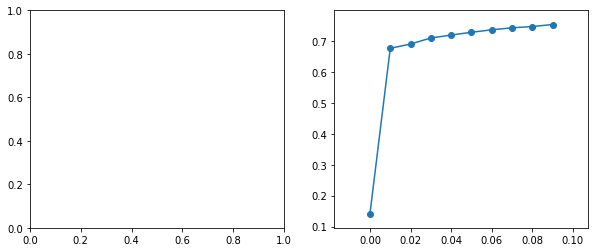

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [15]:
# split data into train and test sets
import numpy as np
seed = 7
test_size = 0.30
Y: np.ndarray = PDdata.pop('Cover_Type').values
X: np.ndarray = PDdata.values
labels = pd.unique(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


#learning_rates = [0.01,0.05,0.1,0.2,0.3]
learning_rates=  np.arange(0, 0.1, 0.01)

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(10, 4), squeeze=False)
yvalues = []
for lr in learning_rates:
            
    model=xgb.XGBClassifier(random_state=1,learning_rate=lr)
    model.fit(X_train, y_train)
    
    prdY = model.predict(X_test)
    
    
    predictions = [round(value) for value in prdY]
    
    yvalues.append(metrics.accuracy_score(y_test, prdY))
            
            
import matplotlib as mpl
import matplotlib.pyplot as plt


plt.scatter(learning_rates, yvalues)
plt.plot(learning_rates, yvalues)
    
plt.show()


from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt



cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred, 
                      binary=False)
print(cm)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

acu = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acu,2))







In [ ]:

#Accuracy: 0.76   convAfterUndersampling
#Accuracy: 0.75   convETC
#Accuracy: 0.69   convKBest


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y_pred = label_binarize(y_pred, classes=[0,1,2,3,4,5,6])
y_test = label_binarize(y_test, classes=[0,1,2,3,4,5,6])    
for i in range(n_classes):
   
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    
    
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [ ]:

# split data into train and test sets
seed = 7
test_size = 0.3
Y: np.ndarray = PDdata.pop('Cover_Type').values
    
#Y = label_binarize(Y, classes=[0,1,2,3,4,5,6])
n_classes = 7

X: np.ndarray = PDdata.values
labels = pd.unique(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)



# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

print(model)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)

print("Accuracy: %.2f%%" % (accuracy ))

